# Dependencies

In [1]:
import tensorflow as tf
import os

2025-08-17 11:06:05.813779: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-17 11:06:05.814029: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-17 11:06:05.850310: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-17 11:06:06.764337: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

# Remove dodgy images

In [2]:
import cv2
import filetype

In [3]:
data_dir = 'data'
images_ext = ['jpg', 'jpeg', 'png', 'bmp']

In [4]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            tip = filetype.guess(image_path)  # Pass path, not img array
            if tip is None or tip.extension not in images_ext:
                print(f"Invalid image file: {image_path} with type {tip.extension if tip else 'Unknown'}")
        except Exception as e:
            print(f"Error reading image {image_path}: {e}")

Invalid image file: data/Trucks/semi-us-jun-img-vp-nd-07-1080x1080-1.webp with type webp
Invalid image file: data/Trucks/Difference-Between-a-Semi-Truck-and-a-Truck.webp with type webp
Invalid image file: data/Trucks/how-to-make-money-with-a-semi-truck.webp with type webp
Invalid image file: data/Trucks/ITS-ME-vtc_electric1143-1400-1000x500.jpg with type webp
Invalid image file: data/Trucks/volvo-semi-with-giant-sleeper-cab.webp with type webp
Invalid image file: data/Trucks/NEWS_Shacman-X6000-800.jpg.webp with type webp
Invalid image file: data/Trucks/truck-2528semi-2529-jpeg.webp with type webp
Invalid image file: data/Trucks/nz-eactros-600-winter-testing-e-lkw-electric-truck-2025-03-min-1400x933.jpg.webp with type webp
Invalid image file: data/Trucks/volvo-trucks-fm-electric-e-lkw-electric-truck-schweiz-switzerland-min-1400x933.jpg.webp with type webp
Invalid image file: data/Trucks/g2015-0205-jpeg.webp with type webp
Invalid image file: data/Trucks/daa1e3df0551-csm_trucktype-news-i

# Load data

In [5]:
import numpy as np
from matplotlib import pyplot as plt

In [6]:
data = tf.keras.preprocessing.image_dataset_from_directory(
    'data',
    image_size=(224, 224),  # Resize images to a common size
    batch_size=32,          # Set batch size
    shuffle=True,           # Shuffle the dataset
    seed=42                 # Set seed for reproducibility
)

Found 732 files belonging to 4 classes.


2025-08-17 11:06:07.513699: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [7]:
data_iterator = data.as_numpy_iterator()

In [8]:
batch = data_iterator.next()

2025-08-17 11:06:07.827563: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


In [9]:
batch

(array([[[[ 25.390625,  21.390625,   9.390625],
          [ 52.196426,  48.196426,  36.196426],
          [ 78.24553 ,  74.24553 ,  62.245533],
          ...,
          [109.29236 ,  93.86157 ,  63.138428],
          [141.94846 , 123.97302 ,  90.97302 ],
          [194.3317  , 175.3317  , 142.3317  ]],
 
         [[ 34.997932,  29.712208,  17.712208],
          [ 41.08479 ,  36.589283,  24.589283],
          [ 79.23816 ,  74.613106,  62.613106],
          ...,
          [167.4068  , 150.62555 , 118.77527 ],
          [178.25992 , 159.06354 , 129.67294 ],
          [159.34146 , 139.61601 , 110.96869 ]],
 
         [[ 59.6027  ,  52.745556,  41.22622 ],
          [ 51.77517 ,  46.007317,  34.19256 ],
          [ 77.244415,  71.29799 ,  59.531662],
          ...,
          [161.24419 , 142.17444 , 107.66967 ],
          [118.393166,  98.90661 ,  76.451416],
          [ 77.261185,  59.245552,  46.026005]],
 
         ...,
 
         [[  8.      ,   5.      ,   0.      ],
          [  8.   

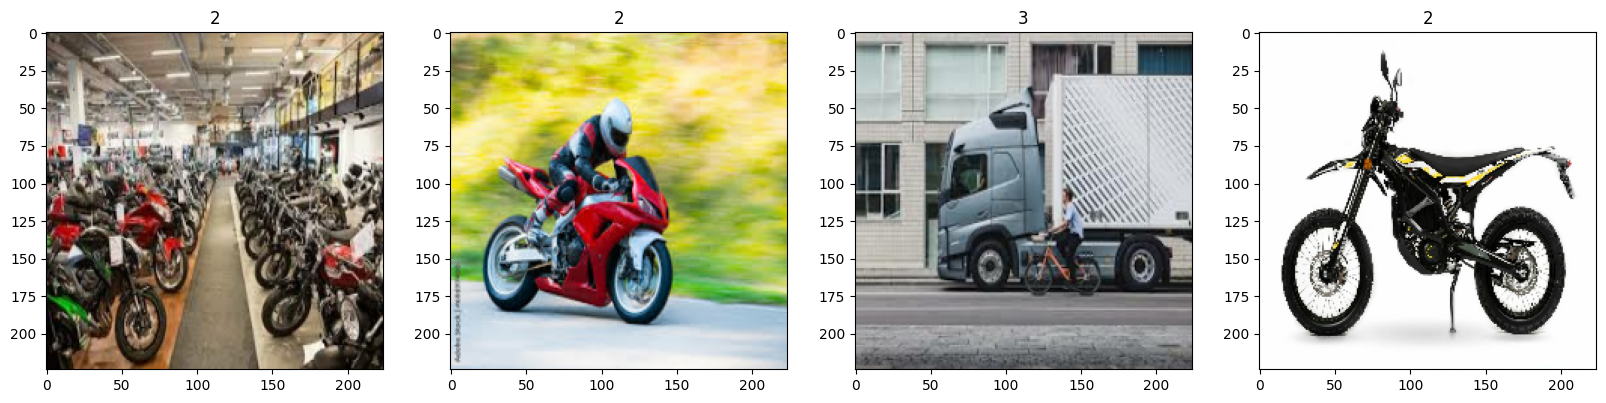

In [10]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

bus 0
car 1
bike 2
truck 3

# Scale data

In [11]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
data.as_numpy_iterator().next()

2025-08-17 11:06:09.055900: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


(array([[[[106.08475  , 129.07582  , 111.07806  ],
          [109.948944 , 128.91321  , 109.92433  ],
          [ 97.50035  , 110.43339  ,  92.43339  ],
          ...,
          [245.       , 249.       , 252.       ],
          [245.       , 249.       , 252.       ],
          [244.00224  , 248.00224  , 251.00224  ]],
 
         [[139.83453  , 162.83675  , 146.84792  ],
          [128.76727  , 149.71365  , 132.72046  ],
          [134.55945  , 147.48578  , 129.51256  ],
          ...,
          [245.       , 249.       , 252.       ],
          [245.       , 249.       , 252.       ],
          [244.00224  , 248.00224  , 251.00224  ]],
 
         [[118.63247  , 142.60349  , 128.61246  ],
          [ 89.324844 , 110.25365  ,  95.29367  ],
          [131.34074  , 143.29611  , 129.30727  ],
          ...,
          [245.       , 249.       , 252.       ],
          [245.       , 249.       , 252.       ],
          [244.00224  , 248.00224  , 251.00224  ]],
 
         ...,
 
         [[1

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
data.as_numpy_iterator().next()

(array([[[[6.82352960e-01, 7.92156875e-01, 8.86274517e-01],
          [6.82352960e-01, 7.92156875e-01, 8.86274517e-01],
          [6.82352960e-01, 7.92156875e-01, 8.86274517e-01],
          ...,
          [1.69362739e-01, 2.05208331e-01, 1.21200979e-01],
          [2.49264702e-01, 2.88480401e-01, 1.94362745e-01],
          [1.95955887e-01, 2.35171571e-01, 1.37806371e-01]],
 
         [[6.82352960e-01, 7.92156875e-01, 8.86274517e-01],
          [6.82352960e-01, 7.92156875e-01, 8.86274517e-01],
          [6.82352960e-01, 7.92156875e-01, 8.86274517e-01],
          ...,
          [1.52359068e-01, 1.88204661e-01, 1.04197301e-01],
          [2.25520834e-01, 2.64736533e-01, 1.70618877e-01],
          [1.81135103e-01, 2.20350802e-01, 1.22985601e-01]],
 
         [[6.82352960e-01, 7.92156875e-01, 8.86274517e-01],
          [6.82352960e-01, 7.92156875e-01, 8.86274517e-01],
          [6.82352960e-01, 7.92156875e-01, 8.86274517e-01],
          ...,
          [1.51325062e-01, 1.87170655e-01, 1.0316

# Split data

In [15]:
train_size = int(0.7 * len(data))
val_size = int(0.2 * len(data))
test_size = int(0.1 * len(data))+1

In [16]:
len(data)

23

In [17]:
train_size

16

In [18]:
val_size

4

In [19]:
test_size

3

In [20]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

# Building the model

In [21]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [23]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

/home/kjay/Documents/Vehicle-Classification/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.compile( optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     5,538,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,576,932 (21.27 MB)

 Trainable params: 5,576,932 (21.27 MB)

 Non-trainable params: 0 (0.00 B)

# Train

In [26]:
logdir = 'logs'

In [27]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [28]:
hist = model.fit(train, epochs=35, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/35


2025-08-17 11:06:12.267836: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - accuracy: 0.2471 - loss: 2.1053

2025-08-17 11:06:17.888892: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 404ms/step - accuracy: 0.2891 - loss: 1.7368 - val_accuracy: 0.3516 - val_loss: 1.3755
Epoch 2/35


2025-08-17 11:06:19.240760: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - accuracy: 0.3382 - loss: 1.3701

2025-08-17 11:06:24.771760: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 408ms/step - accuracy: 0.3633 - loss: 1.3630 - val_accuracy: 0.3672 - val_loss: 1.3574
Epoch 3/35


2025-08-17 11:06:25.720052: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - accuracy: 0.3340 - loss: 1.3624

2025-08-17 11:06:31.841054: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 411ms/step - accuracy: 0.3672 - loss: 1.3341 - val_accuracy: 0.4219 - val_loss: 1.3247
Epoch 4/35


2025-08-17 11:06:33.225801: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step - accuracy: 0.3218 - loss: 1.3846

2025-08-17 11:06:38.778124: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 439ms/step - accuracy: 0.3574 - loss: 1.3387 - val_accuracy: 0.3516 - val_loss: 1.2808
Epoch 5/35


2025-08-17 11:06:40.147226: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 0.3965 - loss: 1.2858

2025-08-17 11:06:46.412302: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 425ms/step - accuracy: 0.4219 - loss: 1.2717 - val_accuracy: 0.4766 - val_loss: 1.1843
Epoch 6/35


2025-08-17 11:06:47.574991: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.4758 - loss: 1.1848

2025-08-17 11:06:53.964353: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 446ms/step - accuracy: 0.4785 - loss: 1.1599 - val_accuracy: 0.5938 - val_loss: 1.0728
Epoch 7/35
 1/16 ━━━━━━━━━━━━━━━━━━━━ 13s 910ms/step - accuracy: 0.4375 - loss: 1.2484

2025-08-17 11:06:55.671953: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step - accuracy: 0.5651 - loss: 1.0733

2025-08-17 11:07:01.413335: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 433ms/step - accuracy: 0.5625 - loss: 1.0546 - val_accuracy: 0.6250 - val_loss: 1.0243
Epoch 8/35


2025-08-17 11:07:02.536805: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - accuracy: 0.6304 - loss: 0.9392

2025-08-17 11:07:08.831131: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 440ms/step - accuracy: 0.6172 - loss: 0.9072 - val_accuracy: 0.6875 - val_loss: 0.8345
Epoch 9/35
 1/16 ━━━━━━━━━━━━━━━━━━━━ 13s 893ms/step - accuracy: 0.6562 - loss: 0.8307

2025-08-17 11:07:10.787411: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step - accuracy: 0.6777 - loss: 0.8443

2025-08-17 11:07:15.904587: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 429ms/step - accuracy: 0.7090 - loss: 0.8017 - val_accuracy: 0.7109 - val_loss: 0.7529
Epoch 10/35


2025-08-17 11:07:17.857248: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - accuracy: 0.7434 - loss: 0.6626

2025-08-17 11:07:23.261496: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 413ms/step - accuracy: 0.7520 - loss: 0.6695 - val_accuracy: 0.6797 - val_loss: 0.7354
Epoch 11/35


2025-08-17 11:07:24.389996: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.7689 - loss: 0.5953

2025-08-17 11:07:30.459644: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 424ms/step - accuracy: 0.7637 - loss: 0.5934 - val_accuracy: 0.8438 - val_loss: 0.5574
Epoch 12/35
 1/16 ━━━━━━━━━━━━━━━━━━━━ 11s 791ms/step - accuracy: 0.9688 - loss: 0.3730

2025-08-17 11:07:32.674006: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - accuracy: 0.8838 - loss: 0.4271

2025-08-17 11:07:37.560924: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 428ms/step - accuracy: 0.8594 - loss: 0.4300 - val_accuracy: 0.8359 - val_loss: 0.4647
Epoch 13/35


2025-08-17 11:07:38.956659: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step - accuracy: 0.8345 - loss: 0.4292

2025-08-17 11:07:44.866548: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 435ms/step - accuracy: 0.8438 - loss: 0.3999 - val_accuracy: 0.8281 - val_loss: 0.4390
Epoch 14/35


2025-08-17 11:07:46.478429: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - accuracy: 0.9053 - loss: 0.3192

2025-08-17 11:07:52.862850: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 423ms/step - accuracy: 0.8691 - loss: 0.3802 - val_accuracy: 0.9062 - val_loss: 0.4000
Epoch 15/35
 1/16 ━━━━━━━━━━━━━━━━━━━━ 12s 846ms/step - accuracy: 0.9062 - loss: 0.2264

2025-08-17 11:07:54.164197: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - accuracy: 0.9062 - loss: 0.2664

2025-08-17 11:07:59.401270: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 427ms/step - accuracy: 0.9004 - loss: 0.2899 - val_accuracy: 0.9062 - val_loss: 0.2432
Epoch 16/35


2025-08-17 11:08:00.681863: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - accuracy: 0.9153 - loss: 0.2465

2025-08-17 11:08:07.511905: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 419ms/step - accuracy: 0.9141 - loss: 0.2656 - val_accuracy: 0.9375 - val_loss: 0.1914
Epoch 17/35
 1/16 ━━━━━━━━━━━━━━━━━━━━ 11s 779ms/step - accuracy: 0.8750 - loss: 0.2440

2025-08-17 11:08:09.066532: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 0.9389 - loss: 0.1737

2025-08-17 11:08:14.097279: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 434ms/step - accuracy: 0.9473 - loss: 0.1748 - val_accuracy: 0.9453 - val_loss: 0.1867
Epoch 18/35


2025-08-17 11:08:15.378890: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - accuracy: 0.9350 - loss: 0.2070

2025-08-17 11:08:21.425083: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 423ms/step - accuracy: 0.9277 - loss: 0.2256 - val_accuracy: 0.9219 - val_loss: 0.2324
Epoch 19/35


2025-08-17 11:08:23.418168: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - accuracy: 0.9683 - loss: 0.1398

2025-08-17 11:08:28.703051: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 415ms/step - accuracy: 0.9512 - loss: 0.1699 - val_accuracy: 0.9609 - val_loss: 0.2092
Epoch 20/35


2025-08-17 11:08:30.298009: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - accuracy: 0.9739 - loss: 0.0933

2025-08-17 11:08:36.090878: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 409ms/step - accuracy: 0.9570 - loss: 0.1248 - val_accuracy: 0.9766 - val_loss: 0.1110
Epoch 21/35


2025-08-17 11:08:37.367940: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.9689 - loss: 0.0880

2025-08-17 11:08:43.559591: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 431ms/step - accuracy: 0.9590 - loss: 0.1092 - val_accuracy: 0.9688 - val_loss: 0.1343
Epoch 22/35


2025-08-17 11:08:45.131514: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - accuracy: 0.9676 - loss: 0.0896

2025-08-17 11:08:50.892811: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 435ms/step - accuracy: 0.9531 - loss: 0.1225 - val_accuracy: 0.9453 - val_loss: 0.2192
Epoch 23/35


2025-08-17 11:08:52.590119: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step - accuracy: 0.9584 - loss: 0.1489

2025-08-17 11:08:58.783889: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 430ms/step - accuracy: 0.9629 - loss: 0.1360 - val_accuracy: 0.9609 - val_loss: 0.1827
Epoch 24/35


2025-08-17 11:08:59.428746: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - accuracy: 0.9818 - loss: 0.0940

2025-08-17 11:09:05.539507: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 411ms/step - accuracy: 0.9707 - loss: 0.1126 - val_accuracy: 0.9766 - val_loss: 0.0700
Epoch 25/35


2025-08-17 11:09:06.788513: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 0.9731 - loss: 0.0993

2025-08-17 11:09:12.728663: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 422ms/step - accuracy: 0.9766 - loss: 0.0951 - val_accuracy: 0.9922 - val_loss: 0.0579
Epoch 26/35


2025-08-17 11:09:13.978866: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step - accuracy: 0.9838 - loss: 0.0484

2025-08-17 11:09:20.379044: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 419ms/step - accuracy: 0.9844 - loss: 0.0492 - val_accuracy: 0.9844 - val_loss: 0.0747
Epoch 27/35


2025-08-17 11:09:21.783150: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 0.9903 - loss: 0.0317

2025-08-17 11:09:28.252719: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 433ms/step - accuracy: 0.9805 - loss: 0.0480 - val_accuracy: 1.0000 - val_loss: 0.0124
Epoch 28/35


2025-08-17 11:09:28.955641: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 0.9978 - loss: 0.0215

2025-08-17 11:09:35.718370: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 456ms/step - accuracy: 0.9961 - loss: 0.0258 - val_accuracy: 0.9922 - val_loss: 0.0640
Epoch 29/35


2025-08-17 11:09:36.520851: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - accuracy: 0.9928 - loss: 0.0233

2025-08-17 11:09:42.863796: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 438ms/step - accuracy: 0.9883 - loss: 0.0327 - val_accuracy: 0.9844 - val_loss: 0.1094
Epoch 30/35
 1/16 ━━━━━━━━━━━━━━━━━━━━ 14s 959ms/step - accuracy: 1.0000 - loss: 0.0114

2025-08-17 11:09:45.109781: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - accuracy: 0.9917 - loss: 0.0337

2025-08-17 11:09:50.813545: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 455ms/step - accuracy: 0.9844 - loss: 0.0618 - val_accuracy: 0.9922 - val_loss: 0.0214
Epoch 31/35


2025-08-17 11:09:52.085341: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.9888 - loss: 0.0334

2025-08-17 11:09:58.510942: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 454ms/step - accuracy: 0.9863 - loss: 0.0338 - val_accuracy: 0.9844 - val_loss: 0.0323
Epoch 32/35


2025-08-17 11:10:00.063047: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - accuracy: 0.9812 - loss: 0.0495

2025-08-17 11:10:06.300133: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 438ms/step - accuracy: 0.9863 - loss: 0.0402 - val_accuracy: 0.9922 - val_loss: 0.0539
Epoch 33/35


2025-08-17 11:10:08.079319: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 0.9995 - loss: 0.0110

2025-08-17 11:10:13.975969: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 463ms/step - accuracy: 0.9961 - loss: 0.0220 - val_accuracy: 0.9922 - val_loss: 0.0272
Epoch 34/35


2025-08-17 11:10:15.499061: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - accuracy: 0.9975 - loss: 0.0164

2025-08-17 11:10:21.731920: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 464ms/step - accuracy: 0.9941 - loss: 0.0214 - val_accuracy: 0.9922 - val_loss: 0.0158
Epoch 35/35


2025-08-17 11:10:23.080142: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.9825 - loss: 0.0336

2025-08-17 11:10:29.458953: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 456ms/step - accuracy: 0.9805 - loss: 0.0424 - val_accuracy: 1.0000 - val_loss: 0.0111


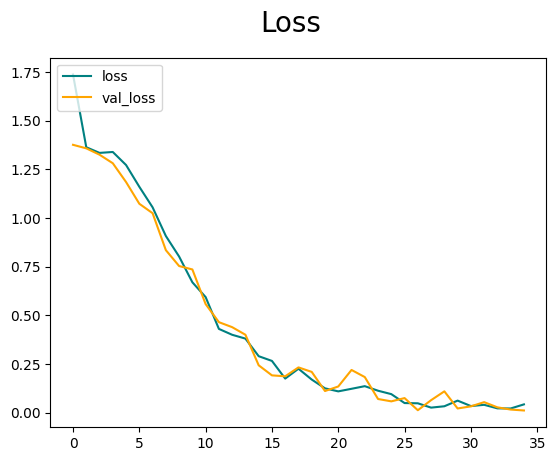

In [29]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

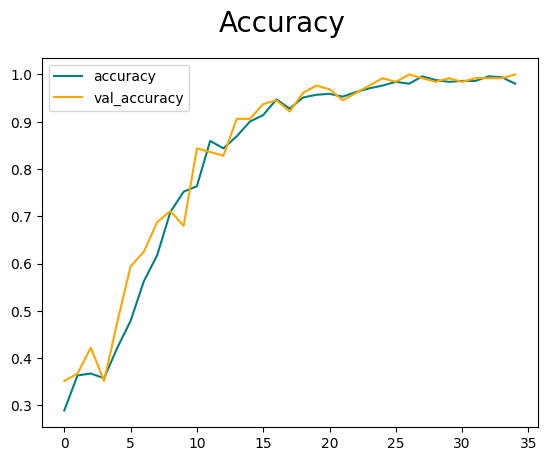

In [30]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluation

In [31]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [32]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [33]:
imp = cv2.imread('test images/aston.png')

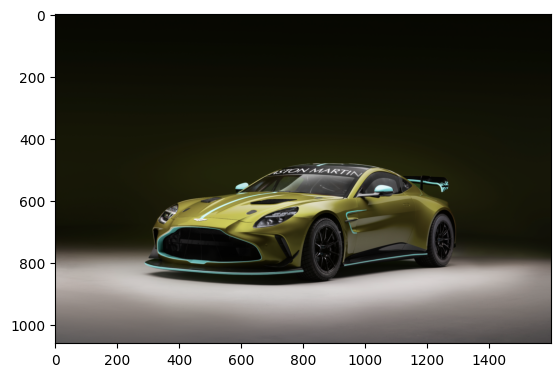

In [34]:
plt.imshow(imp)

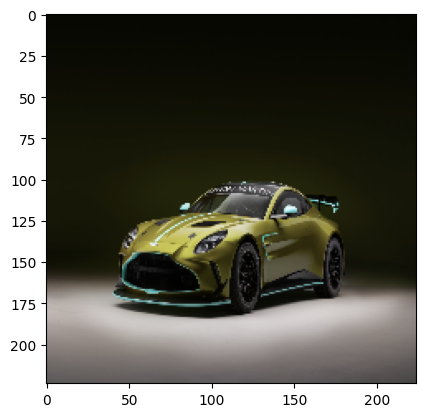

In [35]:
resize = tf.image.resize(imp, (224, 224))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [36]:
pred = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


In [37]:
pred

array([[1.5054990e-08, 9.9995065e-01, 9.1048907e-10, 4.9380811e-05]],
      dtype=float32)

In [38]:
predicted_class = np.argmax(pred)
print(f"Predicted class: {predicted_class}")

if predicted_class == 0:
    print('Bus')
elif predicted_class == 1:
    print('Car')
elif predicted_class == 2:
    print('Bike')
else:
    print('Truck')

Predicted class: 1
Car


In [39]:
# model.save('vehicle_classification_model.h5')

In [40]:
ad.jpg'

SyntaxError: unterminated string literal (detected at line 1) (139220826.py, line 1)